In [1]:
import yfinance as yf
import pandas as pd

In [2]:
START_DATE = '2019-10-01'
END_DATE = '2019-11-30'
OCT_MONTH = 10
NOV_MONTH = 11
NASDAQ_TREASURY_DATA_CSV_URL = \
    "https://data.nasdaq.com/api/v3/datasets/USTREASURY/YIELD.csv?api_key=x6ZcYtB4RzvAVop7E-U6"

In [3]:
# We have chosen below ETFS
# Vanguard FTSE Europe Index Fund ETF Shares (VGK)
#   https://finance.yahoo.com/quote/vgk/
# SPDR Gold Shares (GLD)
#   https://finance.yahoo.com/quote/GLD/
SPDR_GOLD_ETF = 'GLD'
VOODOO_FTSE_ETF = 'VGK'

In [4]:
# 10 Years treasury data, so filter using START_DATE and END_DATE
treasury_yield_df = pd.read_csv(NASDAQ_TREASURY_DATA_CSV_URL, header=0, parse_dates=[0],
                                infer_datetime_format=True) \
    .set_index('Date')
labels_to_drop = ['1 MO', '2 MO', '3 MO', '6 MO', '1 YR', '20 YR']
treasury_yield_df = treasury_yield_df.drop(columns=labels_to_drop)
treasury_yield_df = treasury_yield_df.loc[
    (treasury_yield_df.index >= START_DATE) & (treasury_yield_df.index <= END_DATE)]

In [5]:
# Yahoo returns last day of Sept as well, so filter using START_DATE and END_DATE
gold_etf_df = yf.download(
    [SPDR_GOLD_ETF], start=START_DATE, end=END_DATE).loc[START_DATE:END_DATE]
ftse_etf_df = yf.download([VOODOO_FTSE_ETF], start=START_DATE, end=END_DATE).loc[
              START_DATE:END_DATE]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
# 2.1	Compute the daily returns of your Gold ETF
gold_etf_df['Daily_returns'] = gold_etf_df['Open'] - gold_etf_df['Close']
# 2.1	Compute the daily returns of your Gold ETF
ftse_etf_df['Daily_returns'] = ftse_etf_df['Open'] - ftse_etf_df['Close']

/tmp/ipykernel_34279/615614034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ftse_etf_df['Daily_returns'] = ftse_etf_df['Open'] - ftse_etf_df['Close']


In [7]:
def calculate_monthly_avg_price_or_yield(df, col_name, month):
    monthly_average = df[col_name].groupby(
        df.index.map(lambda x: x.month)).mean()
    return monthly_average[month]

In [8]:
def calculate_std_deviation_in_price_or_yield(df, col_name, month):
    monthly_average = df[col_name].groupby(
        df.index.map(lambda x: x.month)).std()
    return monthly_average[month]

In [9]:
# 3.1 to 3.3
# calculate avg yield/price of bonds and ETFs for Oct19 and Nov19
calculate_monthly_avg_price_or_yield(treasury_yield_df, '2 YR', OCT_MONTH)

1.5513636363636365

In [10]:
calculate_monthly_avg_price_or_yield(treasury_yield_df, '3 YR', OCT_MONTH)

1.528181818181818

In [11]:
calculate_monthly_avg_price_or_yield(treasury_yield_df, '5 YR', OCT_MONTH)

1.525

In [12]:
calculate_monthly_avg_price_or_yield(treasury_yield_df, '7 YR', OCT_MONTH)

1.615

In [13]:
calculate_monthly_avg_price_or_yield(treasury_yield_df, '10 YR', OCT_MONTH)

1.7068181818181818

In [14]:
calculate_monthly_avg_price_or_yield(treasury_yield_df, '30 YR', OCT_MONTH)

2.1904545454545454

In [15]:
calculate_monthly_avg_price_or_yield(gold_etf_df, 'Close', OCT_MONTH)

140.87478173297384

In [16]:
calculate_monthly_avg_price_or_yield(ftse_etf_df, 'Close', OCT_MONTH)

54.08000033834706

In [17]:
calculate_monthly_avg_price_or_yield(treasury_yield_df, '2 YR', NOV_MONTH)

1.6126315789473684

In [18]:
calculate_monthly_avg_price_or_yield(treasury_yield_df, '3 YR', NOV_MONTH)

1.612105263157895

In [19]:
calculate_monthly_avg_price_or_yield(treasury_yield_df, '5 YR', NOV_MONTH)

1.6394736842105262

In [20]:
calculate_monthly_avg_price_or_yield(treasury_yield_df, '7 YR', NOV_MONTH)

1.7357894736842103

In [21]:
calculate_monthly_avg_price_or_yield(treasury_yield_df, '10 YR', NOV_MONTH)

1.8121052631578947

In [22]:
calculate_monthly_avg_price_or_yield(treasury_yield_df, '30 YR', NOV_MONTH)

2.2805263157894737

In [23]:
calculate_monthly_avg_price_or_yield(gold_etf_df, 'Close', NOV_MONTH)

138.57049942016602

In [24]:
calculate_monthly_avg_price_or_yield(ftse_etf_df, 'Close', NOV_MONTH)

56.30899982452392

In [25]:
# 3.4 to 3.6
# calculate  std deviation in yield/price of bonds and ETFs for Oct19 and Nov19
calculate_std_deviation_in_price_or_yield(treasury_yield_df, '2 YR', OCT_MONTH)

0.08031458709619882

In [26]:
calculate_std_deviation_in_price_or_yield(treasury_yield_df, '3 YR', OCT_MONTH)

0.09644324082743551

In [27]:
calculate_std_deviation_in_price_or_yield(treasury_yield_df, '5 YR', OCT_MONTH)

0.10446006299971662

In [28]:
calculate_std_deviation_in_price_or_yield(treasury_yield_df, '7 YR', OCT_MONTH)

0.10065263226042505

In [29]:
calculate_std_deviation_in_price_or_yield(treasury_yield_df, '10 YR', OCT_MONTH)

0.10480759530984397

In [30]:
calculate_std_deviation_in_price_or_yield(treasury_yield_df, '30 YR', OCT_MONTH)

0.10129999166677325

In [31]:
calculate_std_deviation_in_price_or_yield(gold_etf_df, 'Close', OCT_MONTH)

0.8312292769141982

In [32]:
calculate_std_deviation_in_price_or_yield(ftse_etf_df, 'Close', OCT_MONTH)

1.3957369784582774

In [33]:
calculate_std_deviation_in_price_or_yield(treasury_yield_df, '2 YR', NOV_MONTH)

0.033803698887540846

In [34]:
calculate_std_deviation_in_price_or_yield(treasury_yield_df, '3 YR', NOV_MONTH)

0.044042775592273216

In [35]:
calculate_std_deviation_in_price_or_yield(treasury_yield_df, '5 YR', NOV_MONTH)

0.052754534740366246

In [36]:
calculate_std_deviation_in_price_or_yield(treasury_yield_df, '7 YR', NOV_MONTH)

0.0610387663223304

In [37]:
calculate_std_deviation_in_price_or_yield(treasury_yield_df, '10 YR', NOV_MONTH)

0.06502810908184431

In [38]:
calculate_std_deviation_in_price_or_yield(treasury_yield_df, '30 YR', NOV_MONTH)

0.07691797104062115

In [39]:
calculate_std_deviation_in_price_or_yield(gold_etf_df, 'Close', NOV_MONTH)

1.562094575152957

In [40]:
calculate_std_deviation_in_price_or_yield(ftse_etf_df, 'Close', NOV_MONTH)

0.2014656412952567

<AxesSubplot:xlabel='Date', ylabel='Yields'>

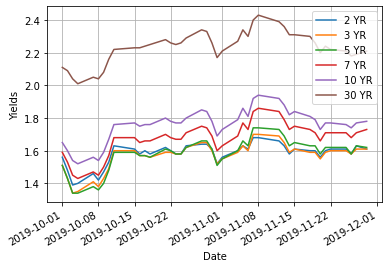

In [41]:
# 4.1 Graph the 6 benchmark securities for the 2 months on 1 plot
treasury_yield_df.plot(ylabel='Yields', grid=True)

/tmp/ipykernel_34279/3542356425.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etf_prices['fste_etf_price'] = ftse_etf_df['Close']
/tmp/ipykernel_34279/3542356425.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etf_prices['gold_etf_price'] = gold_etf_df['Close']


<AxesSubplot:xlabel='Date', ylabel='gold_etf_price'>

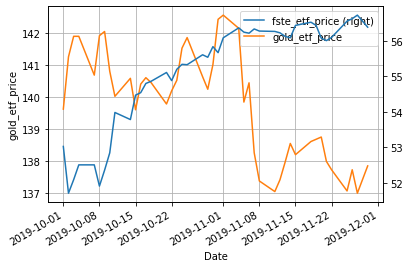

In [42]:
# 4.2 On a separate graph, plot the gold ETF prices
# 4.3 On the same graph, plot the equity ETF prices
etf_prices = ftse_etf_df
etf_prices['fste_etf_price'] = ftse_etf_df['Close']
etf_prices['gold_etf_price'] = gold_etf_df['Close']
etf_prices.plot(y=['fste_etf_price', 'gold_etf_price'], ylabel='gold_etf_price', secondary_y=['fste_etf_price'],
                grid=True)

In [43]:
pass